In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

sns.set(font_scale=1.2)
%matplotlib inline

# EDA

In this notebook I will investigate data.

Load data.

In [2]:
items = pd.read_csv('../data/raw/items.csv')
item_categories = pd.read_csv('../data/raw/item_categories.csv')
shops = pd.read_csv('../data/raw/shops.csv')
sales_train = pd.read_csv('../data/raw/sales_train.csv')
test = pd.read_csv('../data/raw/test.csv')

## Item categories

Let's start exploring with item categories (because it has no dependency on other tables).

In [3]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [4]:
item_categories.shape

(84, 2)

Table is pretty small. We can look at all values.

### item_category_name

In [5]:
item_categories.item_category_name.to_list()

['PC - Гарнитуры/Наушники',
 'Аксессуары - PS2',
 'Аксессуары - PS3',
 'Аксессуары - PS4',
 'Аксессуары - PSP',
 'Аксессуары - PSVita',
 'Аксессуары - XBOX 360',
 'Аксессуары - XBOX ONE',
 'Билеты (Цифра)',
 'Доставка товара',
 'Игровые консоли - PS2',
 'Игровые консоли - PS3',
 'Игровые консоли - PS4',
 'Игровые консоли - PSP',
 'Игровые консоли - PSVita',
 'Игровые консоли - XBOX 360',
 'Игровые консоли - XBOX ONE',
 'Игровые консоли - Прочие',
 'Игры - PS2',
 'Игры - PS3',
 'Игры - PS4',
 'Игры - PSP',
 'Игры - PSVita',
 'Игры - XBOX 360',
 'Игры - XBOX ONE',
 'Игры - Аксессуары для игр',
 'Игры Android - Цифра',
 'Игры MAC - Цифра',
 'Игры PC - Дополнительные издания',
 'Игры PC - Коллекционные издания',
 'Игры PC - Стандартные издания',
 'Игры PC - Цифра',
 'Карты оплаты (Кино, Музыка, Игры)',
 'Карты оплаты - Live!',
 'Карты оплаты - Live! (Цифра)',
 'Карты оплаты - PSN',
 'Карты оплаты - Windows (Цифра)',
 'Кино - Blu-Ray',
 'Кино - Blu-Ray 3D',
 'Кино - Blu-Ray 4K',
 'Кино - DV

We can immediately notice, that for most of categories there is bigger category. We will call first part a category, second part -- subcategory.

### item_cagegory_id

Check `item_category_id`.

In [6]:
item_categories.item_category_id.describe()

count    84.000000
mean     41.500000
std      24.392622
min       0.000000
25%      20.750000
50%      41.500000
75%      62.250000
max      83.000000
Name: item_category_id, dtype: float64

There is no jumps.

### Feature engineering ideas
1. Add category as a feature if possible. If it is not possible just duplicate original category.
2. There is some similar subcategories in a categories. For example, `Игры - PS4`, `Аксессуары - PS4`, `Игровые консоли - PS4`. We can use subcategory as a new feature and delete original field.
3. There is two versions of one category: `Программы - Для дома и офиса`, `Программы - Обучающие (Цифра)`. May be we should somehow utilize this similarity:
    * Add new feature, that indicates this `Цифра` token -- binary feature
    * Add text features like BOW or TFiDF -- it will notice the same word
    * Add text features like word2vec, GloVe -- it will notice similar words

## Shops

In [7]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [8]:
shops.shape

(60, 2)

This table is small too.

### shop_name

In [9]:
shops.shop_name.to_list()

['!Якутск Орджоникидзе, 56 фран',
 '!Якутск ТЦ "Центральный" фран',
 'Адыгея ТЦ "Мега"',
 'Балашиха ТРК "Октябрь-Киномир"',
 'Волжский ТЦ "Волга Молл"',
 'Вологда ТРЦ "Мармелад"',
 'Воронеж (Плехановская, 13)',
 'Воронеж ТРЦ "Максимир"',
 'Воронеж ТРЦ Сити-Парк "Град"',
 'Выездная Торговля',
 'Жуковский ул. Чкалова 39м?',
 'Жуковский ул. Чкалова 39м²',
 'Интернет-магазин ЧС',
 'Казань ТЦ "Бехетле"',
 'Казань ТЦ "ПаркХаус" II',
 'Калуга ТРЦ "XXI век"',
 'Коломна ТЦ "Рио"',
 'Красноярск ТЦ "Взлетка Плаза"',
 'Красноярск ТЦ "Июнь"',
 'Курск ТЦ "Пушкинский"',
 'Москва "Распродажа"',
 'Москва МТРЦ "Афи Молл"',
 'Москва Магазин С21',
 'Москва ТК "Буденовский" (пав.А2)',
 'Москва ТК "Буденовский" (пав.К7)',
 'Москва ТРК "Атриум"',
 'Москва ТЦ "Ареал" (Беляево)',
 'Москва ТЦ "МЕГА Белая Дача II"',
 'Москва ТЦ "МЕГА Теплый Стан" II',
 'Москва ТЦ "Новый век" (Новокосино)',
 'Москва ТЦ "Перловский"',
 'Москва ТЦ "Семеновский"',
 'Москва ТЦ "Серебряный Дом"',
 'Мытищи ТРК "XL-3"',
 'Н.Новгород ТРЦ

We can notice some strangenesses:

1. `!Якутск Орджоникидзе, 56 фран` is very similar to `Якутск Орджоникидзе, 56`. It looks like typo.
2. `!Якутск ТЦ "Центральный" фран` is very similar to `Якутск ТЦ "Центральный`. It looks like typo.
3. `Жуковский ул. Чкалова 39м?` is very similar to `Жуковский ул. Чкалова 39м²`. It looks like typo.
4. `РостовНаДону ТРК "Мегацентр Горизонт"` is very similar to `РостовНаДону ТРК "Мегацентр Горизонт" Островной`. It looks like typo.
5. `Москва ТК "Буденовский" (пав.А2)` is very similar to `Москва ТК "Буденовский" (пав.К7)`. But it isn't looks like a mistake, just different pavilions.

We can also find that there are two online shops and `Выездная Торговля`.

### shop_id

In [10]:
shops.shop_id.describe()

count    60.000000
mean     29.500000
std      17.464249
min       0.000000
25%      14.750000
50%      29.500000
75%      44.250000
max      59.000000
Name: shop_id, dtype: float64

There is no jumps.

### Feature engineering ideas
1. Correct typos.
2. Feature with city of a shop (may be problems with online entries).
    * We can also add features, connected to city. For example, number of residents.
3. Feature with mall of a shop.
4. Feature with coordinates of a shop.

## Items

In [11]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


As we can see, there is a dependency on the table `item_categories`. We will explore it later.

In [12]:
items.shape

(22170, 3)

This table is pretty big. It will be difficult to deal with it as with categorical feature.

### item_name

Let's explore values of field `item_name`.

We can immediately notice, that some names begins with characters `!`, `*`. It is a potential possibility for duplicates. Check possible first characters if `item_name`.

In [13]:
first_character = items.item_name.apply(lambda x: x[0])
first_character.unique()

array(['!', '*', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
       'i', 'o', 'Ё', 'А', 'Б', 'В', 'Г', 'Д', 'Е', 'Ж', 'З', 'И', 'Й',
       'К', 'Л', 'М', 'Н', 'О', 'П', 'Р', 'С', 'Т', 'У', 'Ф', 'Х', 'Ц',
       'Ч', 'Ш', 'Щ', 'Э', 'Ю', 'Я'], dtype=object)

We should check `!`, `*`, `/`.

We can also notice that some items ends with `D`, we should check it too.

#### Checking `!`

In [14]:
items[first_character == '!'].item_name.to_list()

['! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D',
 '!ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия]']

In [15]:
items[items.item_name.str.contains('ВО В')]

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
9930,ВО ВСЕ ТЯЖКИЕ Сезон 1 2DVD,9930,40
11464,ЖЕНА ПУТЕШЕСТВЕННИКА ВО ВРЕМЕНИ WB (регион),11464,40


In this case `!` looks like a typo. For working text features we should delete it, but remain it as a distinct item.

In [16]:
items[items.item_name.str.contains(
    'ABBYY FineReader 12 Professional Edition Full'
)].item_name.to_list()

['!ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия]',
 'ABBYY FineReader 12 Professional Edition Full (коробка)']

In this case `!` looks like a typo. For working text features we should delete it, but remain it as a distinct item.

#### Checking `*`

In [17]:
suspicious_list = items[first_character == '*'].item_name.to_list()
suspicious_list

['***В ЛУЧАХ СЛАВЫ   (UNV)                    D',
 '***ГОЛУБАЯ ВОЛНА  (Univ)                      D',
 '***КОРОБКА (СТЕКЛО)                       D',
 '***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ  (UNI)             D',
 '***УДАР ПО ВОРОТАМ (UNI)               D',
 '***УДАР ПО ВОРОТАМ-2 (UNI)               D',
 '***ЧАЙ С МУССОЛИНИ                     D',
 '***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI)             D',
 '*ЗА ГРАНЬЮ СМЕРТИ                       D',
 '*ЛИНИЯ СМЕРТИ                           D',
 '*МИХЕЙ И ДЖУМАНДЖИ  Сука любовь',
 '*СПАСАЯ ЭМИЛИ                           D',
 '*ЧОКНУТЫЙ ПРОФЕССОР /МАГИЯ/             D']

In [18]:
for element in suspicious_list:
    count_star = element.count('*')
    cut_element = element[count_star:]
    found_list = items[items.item_name.str.startswith(
        cut_element[:5]
    )].item_name.to_list()
    print(cut_element)
    print(found_list)
    print(10*'-')

В ЛУЧАХ СЛАВЫ   (UNV)                    D
[]
----------
ГОЛУБАЯ ВОЛНА  (Univ)                      D
['ГОЛУБАЯ БЕЗДНА  (BD)', 'ГОЛУБАЯ БЕЗДНА (регион)']
----------
КОРОБКА (СТЕКЛО)                       D
[]
----------
НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ  (UNI)             D
['НОВЫЕ МСТИТЕЛИ: ГЕРОИ ЗАВТРАШНЕГО ДНЯ  э (BD)', 'НОВЫЕ ПРИКЛЮЧЕНИЯ БАРОНА МЮНХГАУЗЕНА (регион)', 'НОВЫЕ ПРИКЛЮЧЕНИЯ ЗОЛУШКИ (регион)', 'НОВЫЕ ПРИКЛЮЧЕНИЯ СТИЧА (регион)']
----------
УДАР ПО ВОРОТАМ (UNI)               D
[]
----------
УДАР ПО ВОРОТАМ-2 (UNI)               D
[]
----------
ЧАЙ С МУССОЛИНИ                     D
[]
----------
ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI)             D
[]
----------
ЗА ГРАНЬЮ СМЕРТИ                       D
['ЗА ГРАНЬЮ']
----------
ЛИНИЯ СМЕРТИ                           D
[]
----------
МИХЕЙ И ДЖУМАНДЖИ  Сука любовь
['МИХЕЙ И ДЖУМАНДЖИ  Сука любовь', 'МИХЕЙ И ДЖУМАНДЖИ  Сука любовь  LP']
----------
СПАСАЯ ЭМИЛИ                           D
['СПАСАТЕЛИ', 'СПАСАТЕЛИ (3D BD)', 'СПАСАТЕЛИ (BD)', 'С

As we can see, duplicate item is only `МИХЕЙ И ДЖУМАНДЖИ  Сука любовь`. We should merge this two categories in the original dataset.

In [19]:
items[items.item_name.str.contains('МИХЕЙ')]

,item_name,item_id,item_category_id
12,*МИХЕЙ И ДЖУМАНДЖИ Сука любовь,12,55
14690,МИХЕЙ И ДЖУМАНДЖИ Сука любовь,14690,55
14691,МИХЕЙ И ДЖУМАНДЖИ Сука любовь LP,14691,58


#### Checking `/`

In [20]:
suspicious_list = items[first_character == '/'].item_name.to_list()
suspicious_list

['//АДРЕНАЛИН: ОДИН ПРОТИВ ВСЕХ (Регион)',
 '//МОНГОЛ С.Бодров (Регион)',
 '//НЕ ОСТАВЛЯЮЩИЙ СЛЕДА (Регион)',
 '/БОМБА ДЛЯ НЕВЕСТЫ /2DVD/               D',
 '/ЗОЛОТАЯ КОЛЛЕКЦИЯ м/ф-72',
 '/ОДНАЖДЫ В КИТАЕ-2',
 '/ПОСЛЕДНИЙ ШАНС',
 '/ПРОКЛЯТЬЕ ЭЛЬ ЧАРРО',
 '/СЕВЕР И ЮГ /Ч.2/',
 '/СМЕРТЕЛЬНЫЙ РАСКЛАД',
 '/ТЫ  - ТРУП',
 '/УМНОЖАЮЩИЙ ПЕЧАЛЬ т.2 (сер.3-4)']

In [21]:
for element in suspicious_list:
    count_star = element.count('/')
    cut_element = element[count_star:]
    found_list = items[items.item_name.str.startswith(
        cut_element[:-5]
    )].item_name.to_list()
    print(cut_element)
    print(found_list)
    print(10*'-')

АДРЕНАЛИН: ОДИН ПРОТИВ ВСЕХ (Регион)
[]
----------
МОНГОЛ С.Бодров (Регион)
[]
----------
НЕ ОСТАВЛЯЮЩИЙ СЛЕДА (Регион)
[]
----------
МБА ДЛЯ НЕВЕСТЫ /2DVD/               D
[]
----------
ОЛОТАЯ КОЛЛЕКЦИЯ м/ф-72
[]
----------
ОДНАЖДЫ В КИТАЕ-2
[]
----------
ПОСЛЕДНИЙ ШАНС
['ПОСЛЕДНИЙ БОЙСКАУТ (регион)', 'ПОСЛЕДНИЙ БОЙСКАУТ WB (BD)', 'ПОСЛЕДНИЙ ДРАКОН. В ПОИСКАХ МАГИЧЕСКОЙ ЖЕМЧУЖИНЫ (регион)', 'ПОСЛЕДНИЙ КОРОЛЬ ШОТЛАНДИИ (BD)', 'ПОСЛЕДНИЙ НЕАНДЕРТАЛЕЦ', 'ПОСЛЕДНИЙ РЕЙС "АЛЬБАТРОСА" 1-2 серии а', 'ПОСЛЕДНИЙ РУБЕЖ', 'ПОСЛЕДНИЙ РУБЕЖ (BD)', 'ПОСЛЕДНИЙ САМУРАЙ WB', 'ПОСЛЕДНИЙ САМУРАЙ WB (BD)', 'ПОСЛЕДНИЙ САМУРАЙ WB (регион)']
----------
ПРОКЛЯТЬЕ ЭЛЬ ЧАРРО
[]
----------
ВЕР И ЮГ /Ч.2/
[]
----------
СМЕРТЕЛЬНЫЙ РАСКЛАД
[]
----------
ТЫ  - ТРУП
[]
----------
УМНОЖАЮЩИЙ ПЕЧАЛЬ т.2 (сер.3-4)
[]
----------


As we can see, there is no duplicates.

#### Checking `D`

In [22]:
suspicious_list = items[items.item_name.str.endswith(
    '    D'
)].item_name.to_list()
suspicious_list

['! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D',
 '***В ЛУЧАХ СЛАВЫ   (UNV)                    D',
 '***ГОЛУБАЯ ВОЛНА  (Univ)                      D',
 '***КОРОБКА (СТЕКЛО)                       D',
 '***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ  (UNI)             D',
 '***УДАР ПО ВОРОТАМ (UNI)               D',
 '***УДАР ПО ВОРОТАМ-2 (UNI)               D',
 '***ЧАЙ С МУССОЛИНИ                     D',
 '***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI)             D',
 '*ЗА ГРАНЬЮ СМЕРТИ                       D',
 '*ЛИНИЯ СМЕРТИ                           D',
 '*СПАСАЯ ЭМИЛИ                           D',
 '*ЧОКНУТЫЙ ПРОФЕССОР /МАГИЯ/             D',
 '/БОМБА ДЛЯ НЕВЕСТЫ /2DVD/               D']

As we can see we have a complete overlap with already checked items.

### item_id

In [23]:
items.item_id.describe()

count    22170.00000
mean     11084.50000
std       6400.07207
min          0.00000
25%       5542.25000
50%      11084.50000
75%      16626.75000
max      22169.00000
Name: item_id, dtype: float64

There is no jumps.

### item_category_id

Let's investigate connections between `items` and `item_categories`.

In [24]:
categories_counts = items.item_category_id.value_counts()
categories_counts.describe()

count      84.000000
mean      263.928571
std       642.834626
min         1.000000
25%         8.000000
50%        43.500000
75%       291.000000
max      5035.000000
Name: item_category_id, dtype: float64

There is no empty categories. As mean and median is very different, there should be extremely category.

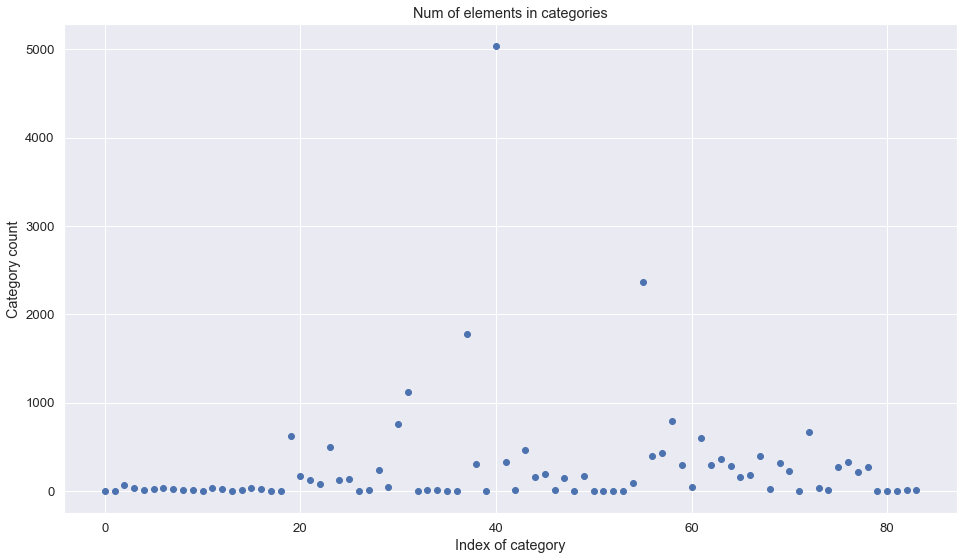

In [25]:
plt.figure(figsize=(16, 9))
plt.scatter(categories_counts.index, categories_counts)
plt.xlabel('Index of category')
plt.ylabel('Category count')
plt.title('Num of elements in categories')
plt.show()

As we can see, there are some very big categories. Let's check them.

In [26]:
big_categories_counts = categories_counts[categories_counts > 500]
big_categories_counts

40    5035
55    2365
37    1780
31    1125
58     790
30     756
72     666
19     628
61     598
23     501
Name: item_category_id, dtype: int64

In [27]:
item_categories[item_categories.item_category_id.isin(
    big_categories_counts.index
)]

,item_category_name,item_category_id
19,Игры - PS3,19
23,Игры - XBOX 360,23
30,Игры PC - Стандартные издания,30
31,Игры PC - Цифра,31
37,Кино - Blu-Ray,37
40,Кино - DVD,40
55,Музыка - CD локального производства,55
58,Музыка - Винил,58
61,Подарки - Атрибутика,61
72,Подарки - Фигурки,72


### Feature engineering ideas
1. Correct typos with `!`, `*`, `/`, `D`.
2. Create TFiDF features over `item_name`.
3. Create word2vec or GloVe features over `item_name`.
4. Num of items in a category (frequency encoding).

## Sales

In [28]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [29]:
sales_train.shape

(2935849, 6)

This is a large table. Fortunately, we will use this table in compressed way with monthly aggregated info in order to make our model more suitable for test.

In [30]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [31]:
test.shape

(214200, 3)

Test data format differs from train_data format.

However, we should firstly explore original train data.

### sales_train

#### date

In [32]:
date = pd.to_datetime(sales_train.date, format='%d.%m.%Y')

Check that there are all days.

In [33]:
date.max() - date.min()

Timedelta('1033 days 00:00:00')

In [34]:
date.unique().shape

(1034,)

There is all days in the dataset.

Check, that first month begins with first day, last month ends with last day.

In [35]:
date.min()

Timestamp('2013-01-01 00:00:00')

In [36]:
date.max()

Timestamp('2015-10-31 00:00:00')

Everything is fine.

#### data_block_num

According to competition page on Kaggle:
> **date_block_num** - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33

In [37]:
sales_train.date_block_num.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

#### shop_id

In [38]:
set(sales_train.shop_id.unique()) == set(shops.shop_id.to_list())

True

There is no redundant shops.

#### item_id

In [39]:
set_sales = set(sales_train.item_id.unique())
set_items = set(items.item_id.to_list())
set_sales == set_items

False

These are different sets.

In [40]:
set_sales.issubset(set_items)

True

In [41]:
extra_items = set_items.difference(set_sales)
len(extra_items)

363

As we can see, there is a list of items, that are not present in a `sales_train`. We should check them in a `test`.

#### item_price

In [42]:
sales_train.item_price.describe()

count    2.935849e+06
mean     8.908532e+02
std      1.729800e+03
min     -1.000000e+00
25%      2.490000e+02
50%      3.990000e+02
75%      9.990000e+02
max      3.079800e+05
Name: item_price, dtype: float64

As we can see, there is no nans, but there is negative value. Let's check it.

In [43]:
sales_train[sales_train.item_price <= 1e-9]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


There is just one such value. It looks like outlier, I think it will be better to delete this row.

In [44]:
sales_train_cleaned = sales_train[sales_train.item_price > 0]

Let's plot histogram to check other strange values. We will plot log1p, because of too big range of values.

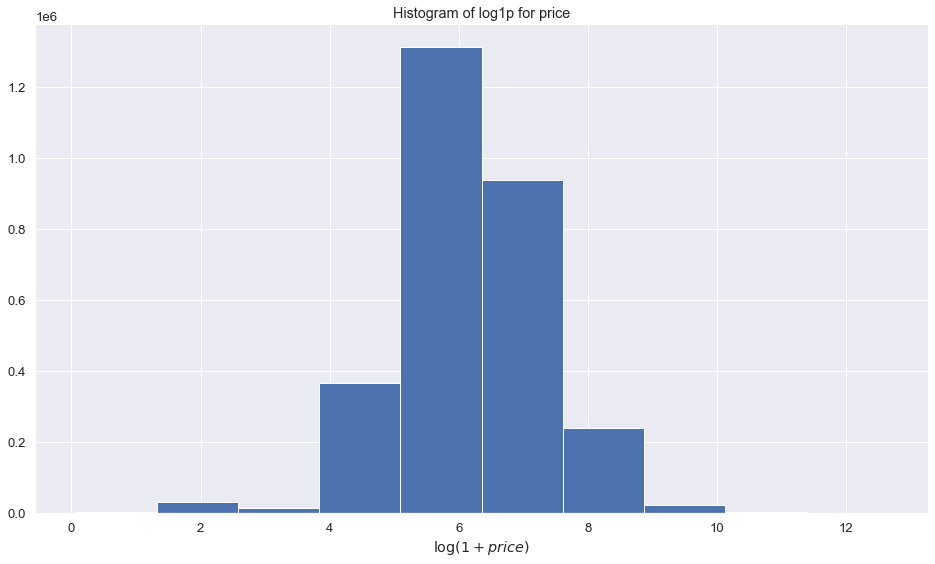

In [45]:
plt.figure(figsize=(16, 9))
plt.hist(np.log1p(sales_train_cleaned.item_price))
plt.xlabel('$\log(1 + price)$')
plt.title('Histogram of log1p for price')
plt.show()

Looks fine for using in linear models (not too skewed).

It can be very interesting to look at dynamic of prices for particular item.

In [46]:
sales_train_cleaned.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [47]:
sales_train_cleaned.groupby('item_id').agg(
    {'item_price': ['mean', 'median', 'std', 'nunique']}
).describe()

item_price                                           
                mean         median           std       nunique
count   21807.000000   21807.000000  19436.000000  21807.000000
mean      823.890533     831.707436     93.444046      5.512679
std      2784.195719    2787.845822    208.202289     14.814321
min         4.914856       0.100000      0.000000      1.000000
25%       186.541323     198.000000     14.616716      1.000000
50%       322.363636     349.000000     33.965593      3.000000
75%       850.000000     849.000000     93.517263      6.000000
max    307980.000000  307980.000000   5813.875386   1601.000000

It can be reasonable to remove too expansive items, that are not present in test dataset.

In [48]:
items_prices = sales_train_cleaned.groupby('item_id').agg(
    {'item_price': ['median', 'min', 'max']}
).sort_values(('item_price', 'median'), ascending=False)
items_prices.head(10)

item_price                    
            median       min       max
item_id                               
6066      307980.0  307980.0  307980.0
13199      50999.0   50999.0   50999.0
7241       49782.0   49782.0   49782.0
7238       42000.0   42000.0   42000.0
13403      41990.0   28992.0   42990.0
14173      40900.0   40900.0   40900.0
5748       35990.0   32990.0   36990.0
13448      34990.0   33490.0   34990.0
13503      34990.0   34990.0   34990.0
2410       34713.5   32437.0   36990.0

Check, that the most expensive prices are not present in test data.

In [49]:
items_prices['in_test'] = items_prices.index.isin(test.item_id.unique())
items_prices.head(10)

item_price                     in_test
            median       min       max        
item_id                                       
6066      307980.0  307980.0  307980.0   False
13199      50999.0   50999.0   50999.0   False
7241       49782.0   49782.0   49782.0   False
7238       42000.0   42000.0   42000.0   False
13403      41990.0   28992.0   42990.0    True
14173      40900.0   40900.0   40900.0   False
5748       35990.0   32990.0   36990.0   False
13448      34990.0   33490.0   34990.0    True
13503      34990.0   34990.0   34990.0    True
2410       34713.5   32437.0   36990.0   False

We can remove three the most expensive items.

#### item_cnt_day

According to competition page on Kaggle:
> **item_cnt_day** - number of products sold. You are predicting a monthly amount of this measure

As I understand, negative values tell us about return of item.

In [50]:
sales_train.item_cnt_day.describe()

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

Check, that there is no strange values.

In [51]:
np.sort(sales_train.item_cnt_day.unique())

array([-2.200e+01, -1.600e+01, -9.000e+00, -6.000e+00, -5.000e+00,
       -4.000e+00, -3.000e+00, -2.000e+00, -1.000e+00,  1.000e+00,
        2.000e+00,  3.000e+00,  4.000e+00,  5.000e+00,  6.000e+00,
        7.000e+00,  8.000e+00,  9.000e+00,  1.000e+01,  1.100e+01,
        1.200e+01,  1.300e+01,  1.400e+01,  1.500e+01,  1.600e+01,
        1.700e+01,  1.800e+01,  1.900e+01,  2.000e+01,  2.100e+01,
        2.200e+01,  2.300e+01,  2.400e+01,  2.500e+01,  2.600e+01,
        2.700e+01,  2.800e+01,  2.900e+01,  3.000e+01,  3.100e+01,
        3.200e+01,  3.300e+01,  3.400e+01,  3.500e+01,  3.600e+01,
        3.700e+01,  3.800e+01,  3.900e+01,  4.000e+01,  4.100e+01,
        4.200e+01,  4.300e+01,  4.400e+01,  4.500e+01,  4.600e+01,
        4.700e+01,  4.800e+01,  4.900e+01,  5.000e+01,  5.100e+01,
        5.200e+01,  5.300e+01,  5.400e+01,  5.500e+01,  5.600e+01,
        5.700e+01,  5.800e+01,  5.900e+01,  6.000e+01,  6.100e+01,
        6.200e+01,  6.300e+01,  6.400e+01,  6.500e+01,  6.600e

Looks fine.

Look at returns.

In [52]:
(sales_train.item_cnt_day < 0).sum()

7356

It is small number compared to all rows.

It can be reasonable to remove too popular items that are not present in test dataset.

In [53]:
items_sold = sales_train_cleaned.groupby(
    ['item_id', 'date_block_num'], as_index=False
).agg(
    {'item_cnt_day': ['sum']}
).groupby(
    'item_id', as_index=False
).agg(
    {('item_cnt_day', 'sum'): ['sum', 'median', 'max', 'min']}
).sort_values(('item_cnt_day', 'sum', 'median'), ascending=False)
items_sold.head(10)

item_id item_cnt_day                         
                       sum                         
                       sum  median      max     min
20602   20949     187642.0  6547.0  12557.0   255.0
10006   10201       1334.0  1334.0   1334.0  1334.0
3282     3351       2021.0  1010.5   1569.0   452.0
10007   10202        899.0   899.0    899.0   899.0
7077     7223        798.0   798.0    798.0   798.0
1546     1583        660.0   660.0    660.0   660.0
3652     3730       1244.0   622.0   1242.0     2.0
3653     3731      10099.0   619.0   7300.0   190.0
4631     4719       1069.0   534.5    829.0   240.0
7078     7224        504.0   504.0    504.0   504.0

Check, that the most expensive prices are not present in test data.

In [54]:
items_sold['in_test'] = items_sold.item_id.isin(test.item_id.unique())
items_sold.head(10)

item_id item_cnt_day                          in_test
                       sum                                 
                       sum  median      max     min        
20602   20949     187642.0  6547.0  12557.0   255.0    True
10006   10201       1334.0  1334.0   1334.0  1334.0    True
3282     3351       2021.0  1010.5   1569.0   452.0    True
10007   10202        899.0   899.0    899.0   899.0    True
7077     7223        798.0   798.0    798.0   798.0    True
1546     1583        660.0   660.0    660.0   660.0    True
3652     3730       1244.0   622.0   1242.0     2.0   False
3653     3731      10099.0   619.0   7300.0   190.0    True
4631     4719       1069.0   534.5    829.0   240.0    True
7078     7224        504.0   504.0    504.0   504.0    True

As we can see, the most popular items are already in test set. We don't have to delete anything.

#### (item_id, shop_id)

In [55]:
train_pairs = set(
    map(
        lambda x: f'{x[0]}_{x[1]}', 
        zip(sales_train.item_id, sales_train.shop_id)
    )
)
print(f'Num of unique pairs in train: {len(train_pairs)}')

Num of unique pairs in train: 424124


We will compare it with test in the future.

#### Feature engineering ideas
1. `date`:
    * Add year, month, day, day of week.
    * Add holiday, working_day indicators, time past since last holiday.
    * Add fourier features with week periodicity.
    
2. `item_price`:
    * Delete outlier in `item_price` with negative price
    * Add integer part of a price and fractional part
    * Add log1p of price for more normal distribution (can be beneficial for linar models and NN)
    * Deviatioin of price for good in a month
    * Remove too three the most expensive items
3. `item_cnt_day`
    * How many time was item returned in a month

### test

Examine test set.

In [56]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


#### shop_id

In [57]:
test.shop_id.unique()

array([ 5,  4,  6,  3,  2,  7, 10, 12, 28, 31, 26, 25, 22, 24, 21, 15, 16,
       18, 14, 19, 42, 50, 49, 53, 52, 47, 48, 57, 58, 59, 55, 56, 36, 37,
       35, 38, 34, 46, 41, 44, 39, 45])

In [58]:
test.shop_id.unique().shape[0]

42

In [59]:
shops.shop_id.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

In [60]:
shops.shop_id.unique().shape[0]

60

There are not all shops in the test dataset. May be, we can use this information somehow.

Compare shops in train and test.

In [61]:
set(test.shop_id).issubset(set(sales_train.shop_id))

True

All shops from test is present in train.

#### item_id

In [62]:
test.item_id.unique().shape

(5100,)

In [63]:
items.item_id.unique().shape

(22170,)

Check that set of test items is inside of set of train items.

In [64]:
test_item_set = set(test.item_id)
train_item_set = set(sales_train.item_id)
test_item_set.issubset(train_item_set)

False

There are some items, that are present in test, but not present in train. We have to investigate it.

In [65]:
len(test_item_set.difference(train_item_set))

363

This is not soo much in comparison with all test items: $5100$, but it can be a problem, because we don't know anything about this items.

There is just some small portion of items, that will be tested. We can mark them.

#### (item_id, shop_id)

In [66]:
test_pairs = set(
    map(
        lambda x: f'{x[0]}_{x[1]}', 
        zip(test.item_id, test.shop_id)
    )
)
print(f'Num of unique pairs in test: {len(test_pairs)}')

Num of unique pairs in test: 214200


As we can see it is about two times smaller, that for the train data.

We also can find, that this value is $214200 = 5100 \cdot 42$. That means, that all possible pairs of given (item_id, shop_id) are present in a train set.

As for train, we can find out, that $424124 \neq 60 \cdot 22170 = 1330200$. That means, that not all possible pairs are present in train.

For train/test consistency we can:
1. Add all possible pairs to train dataset. This will increase the amount of data up to 3 times. Also we don't know all this data, such as price.

Let's check how much pairs are not present in train at all.

In [67]:
len(test_pairs.difference(train_pairs))

102796

It is almost half of all pairs. This can lead to a lot of problems.

#### Feature engineering ideas
1. `shop_id`:
    * Add to train dataset indicator, that this shop is present in test dataset
2. `item_id`:
    * Add to train dataset indicator, that this item is present in test dataset
3. `(item_id, shop_id)`
    * Add all possible pairs in a month to mimic test set
    * Find nearest neighbour in (item, shop) space and add features of some nearest neighbours

### train

We can now move to creating a new dataset with aggregating by months. It will be done in 2.0-db-creating-dataset.ipynb.

Here we just execute it and continue analysing.

In [68]:
train = pd.read_hdf('../data/processed/train.h5', 'table')
test = pd.read_hdf('../data/processed/test.h5', 'table')

#### Month average target value

According to 3.0-db-baseline.ipynb we know test average on public leaderboard. We can compare it with train data.

On the one hand big difference can tell us about difference in distrubutions. On the other hand it can be just a consequence of hided private part (it can influence the average much).

In [69]:
mean_target_dict = {'date_block_num': [], 'mean_target': []}
for date_block_num in train.date_block_num.unique():
    train_block = train[train.date_block_num == date_block_num]
    train_block_filtered = train_block[train_block.item_in_test 
                                       & train_block.shop_in_test]
    mean_target_dict['date_block_num'].append(date_block_num)
    mean_target_dict['mean_target'].append(train_block_filtered.target.mean())

# add value we got from lb probing
mean_target_dict['date_block_num'].append(test.date_block_num.iloc[0])
mean_target_dict['mean_target'].append(0.2839)
mean_target_df = pd.DataFrame(mean_target_dict)

In [70]:
train_block = train[train.date_block_num == 22]
train_block_filtered = train_block[train_block.item_in_test 
                                   & train_block.shop_in_test]
train_block_filtered.target.max()

772.0

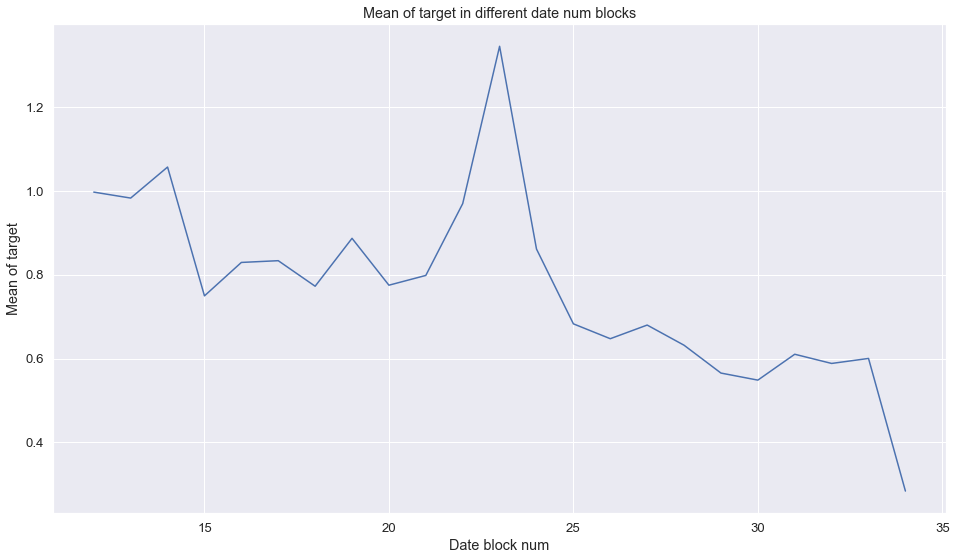

In [71]:
plt.figure(figsize=(16, 9))
plt.plot(mean_target_df.date_block_num, mean_target_df.mean_target)
plt.xlabel('Date block num')
plt.ylabel('Mean of target')
plt.title('Mean of target in different date num blocks')
plt.show()

We can see a some kind of trend here (not taking into account peack in the middle) and value from test don't fits in it well.

#### Month average target variance

According to 3.0-db-baseline.ipynb we know test variance on public leaderboard, because it is MSE. We can compare it with train data.

In [72]:
var_target_dict = {'date_block_num': [], 'variance_target': []}
for date_block_num in train.date_block_num.unique():
    train_block = train[train.date_block_num == date_block_num]
    train_block_filtered = train_block[train_block.item_in_test 
                                       & train_block.shop_in_test]
    var_target_dict['date_block_num'].append(date_block_num)
    var_target_dict['variance_target'].append(train_block_filtered.target.var())

# add value we got from lb probing
var_target_dict['date_block_num'].append(test.date_block_num.iloc[0])
var_target_dict['variance_target'].append(1.21743**2)
var_target_df = pd.DataFrame(var_target_dict)

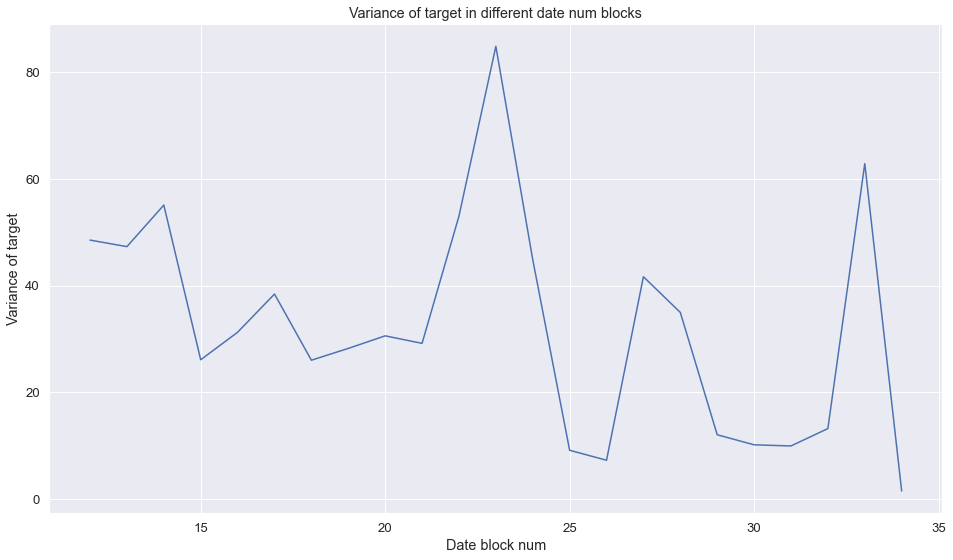

In [73]:
plt.figure(figsize=(16, 9))
plt.plot(var_target_df.date_block_num, var_target_df.variance_target)
plt.xlabel('Date block num')
plt.ylabel('Variance of target')
plt.title('Variance of target in different date num blocks')
plt.show()

We can see a some kind of trend here (not taking into account peack in the middle) and value from test fits in it.

## Validation findings

In this section I will write findings about validation.

### Train/test split

As I found analysing (item, shop) pairs, test dataset consists of all possible pairs, thus we should add empty pairs to our train dataset.

We will add all possible pairs every `date_block_num`.

### Public/private split

I haven't checked exactly public/private split, but model scores are very similar. Thus distributions on public and private similar. It can be achieved by just random split.

### Data leakages

Through leaderboard probing we can find the best constant prediction. It will give us mean value of target on test. This knowledge can be used to correct final prediction (it didn't helped me).

This was made in notebook 3.0-db-baseline.ipynb.

## Futher exploring

1. Train dataset.
2. Data leakages.
3. Check cluster structure of items using embeddings from TFiDF, word2vec sum and UMAP.